# Image To Image Translation - Self Case Study 2

In [86]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import img_to_array, load_img
from PIL import Image
import os

## Loading Data

In [ ]:
!tar -xvf "/content/drive/MyDrive/Case Study 2/data/final/test.tar" -C "/content"  

In [174]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
#https://stackoverflow.com/questions/53295570/userwarning-no-training-configuration-found-in-save-file-the-model-was-not-c/57054106

# loading saved generator model
generator = tf.keras.models.load_model('/content/drive/MyDrive/Case Study 2/data/final/model_200.h5', compile= False)


## Final 

In [175]:
def load_image(image_path):
    '''This function takes image path and returns PIL image instance'''
    #loading image and resizing it to 256x256 using path
    img = load_img(path = image_path, target_size = (256, 256))
    return img

In [176]:
def preprocess(img):
    '''This function takes PIL image instance as input and returns preprocessed image as array of pixels'''
    #converting img to array of pixel values
    image = img_to_array(img)

    #resize image to range [-1,1]
    image = (image - 127.5)/127.5

    return image

In [177]:
#https://stackoverflow.com/questions/10965417/how-to-convert-a-numpy-array-to-pil-image-applying-matplotlib-colormap
#https://stackoverflow.com/questions/47665391/keras-valueerror-input-0-is-incompatible-with-layer-conv2d-1-expected-ndim-4
def final(image_path):
    '''This function takes absolute path of satellite image and returns generated map image '''
    #load image
    img = load_image(image_path)
    # preprocess image
    image_array = preprocess(img)
    
    #reshape
    img_rows, img_cols, img_channels = image_array.shape
    image_array = image_array.reshape(1,img_rows, img_cols, img_channels)

    #generate map image
    map_image_generated = generator.predict(image_array)[0]

    map_image_generated = (map_image_generated + 1) / 2.0

    return map_image_generated
    # return map_image

    



In [178]:
images = os.listdir('test images')

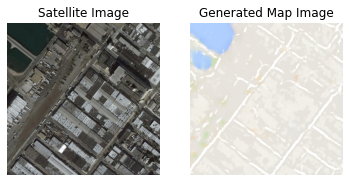

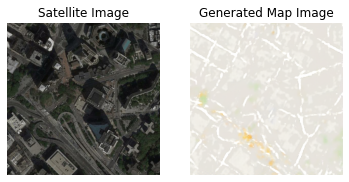

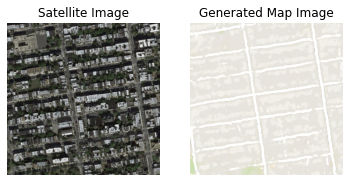

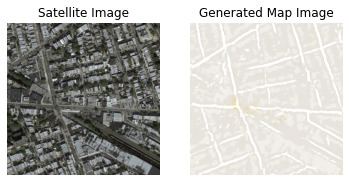

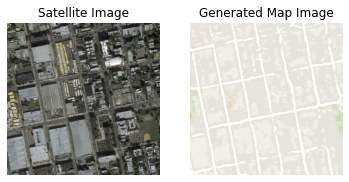

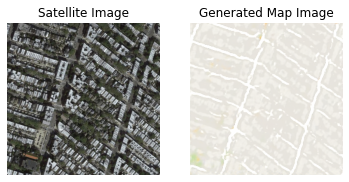

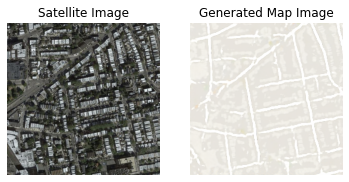

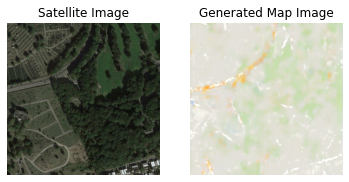

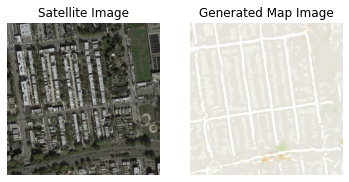

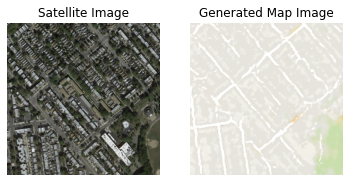

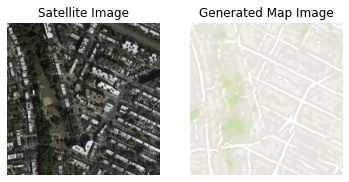

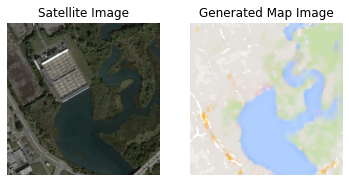

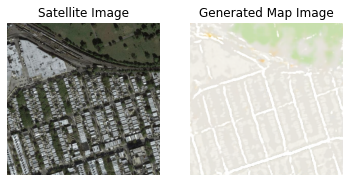

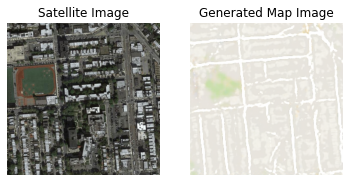

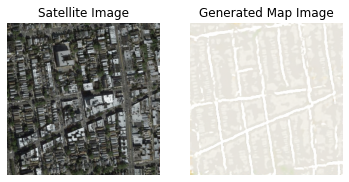

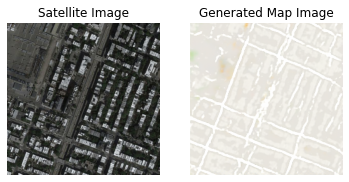

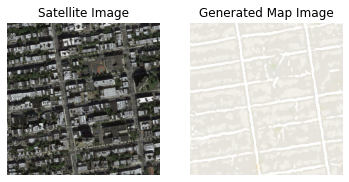

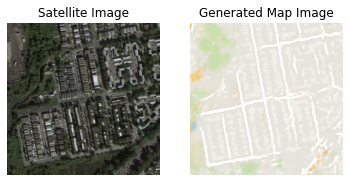

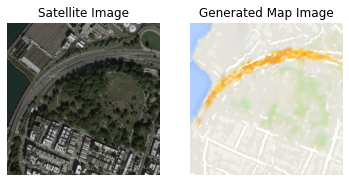

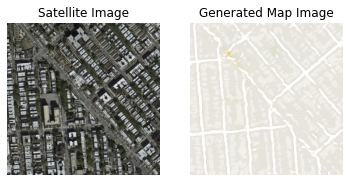

In [179]:
for image in images[-20:]:
    path = os.path.join('/content/test images', image)
    image = final(path)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Satellite Image')
    sat_img = Image.open(path)
    plt.imshow(sat_img)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Generated Map Image')
    plt.imshow(image)
    plt.axis('off')
    